
В этой лабораторной работе мы будем исследовать пользовательские посты, посвящённые COVID-19

In [ ]:
!pip install nltk
!pip install pymorphy2
!pip install pymorphy2-dicts
!pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import pymorphy2
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from textblob import TextBlob

## **Задание 1**
Скачайте набор данных Covid 19 Indian Sentiments on covid19 and lockdown по ссылке 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/МСА/finalSentimentdata2.csv', index_col= 0)

In [ ]:
df.head()

,sentiment,text
3204,sad,agree the poor in india are treated badly thei...
1431,joy,if only i could have spent the with this cutie...
654,joy,will nature conservation remain a priority in ...
2530,sad,coronavirus disappearing in italy show this to...
2296,sad,uk records lowest daily virus death toll since...


## **Задание 2**

В датафрейме оставьте только те строки, у которых в столбце sentiment написано sad или joy

In [ ]:
df = df[df['sentiment'].isin(['sad', 'joy'])]

In [ ]:
df['sentiment'].unique()

array(['sad', 'joy'], dtype=object)

## **Задание 3**

Примените на этом наборе данных шаги предварительной обработки

Загрузим набор стоп-слов для английского языка и проинициализируем объект лемматизатора pymorphy2

In [ ]:
nltk.download('stopwords')
morph = pymorphy2.MorphAnalyzer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Теперь мы можем приступить к предварительной обработке текста. Сначала приведем текст к нижнему регистру и удалим из него хэштеги и отметки пользователей с помощью регулярных выражений:

In [ ]:
df['text'] = df['text'].str.lower() # приведение к нижнему регистру
df['text'] = df['text'].apply(lambda x: re.sub(r'#\w+', '', x)) # удаление хэштегов
df['text'] = df['text'].apply(lambda x: re.sub(r'@\w+', '', x)) # удаление отметок пользователей

Затем произведем токенизацию и лемматизацию текста и удалим стоп-слова:

In [ ]:
df['text'] = df['text'].apply(lambda x: re.findall(r'\b\w+\b', x)) # токенизация
df['text'] = df['text'].apply(lambda x: [morph.parse(word)[0].normal_form for word in x]) # лемматизация
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words]) # удаление стоп-слов

Наконец, произведем векторизацию текста 

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'].apply(lambda x: ' '.join(x)))

## **Задание 4**
Обучите классификатор

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         joy       0.82      0.82      0.82       153
         sad       0.82      0.82      0.82       152

    accuracy                           0.82       305
   macro avg       0.82      0.82      0.82       305
weighted avg       0.82      0.82      0.82       305



## **Задание 5**
Примените шаги предобработки на наборе данных COVID19 Tweets

In [ ]:
df_tweets = pd.read_csv('/content/drive/MyDrive/МСА/covid19_tweets.csv')

In [ ]:
df_tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


Оставим только сами комментарии для удобства

In [ ]:
df_tweets = df_tweets.drop(columns = ['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'is_retweet'])

In [ ]:
df_tweets['text'] = df_tweets['text'].str.lower() # приведение к нижнему регистру
df_tweets['text'] = df_tweets['text'].apply(lambda x: re.sub(r'#\w+', '', x)) # удаление хэштегов
df_tweets['text'] = df_tweets['text'].apply(lambda x: re.sub(r'@\w+', '', x)) # удаление отметок пользователей

In [ ]:
df_tweets['text'] = df_tweets['text'].apply(lambda x: re.findall(r'\b\w+\b', x)) # токенизация
df_tweets['text'] = df_tweets['text'].apply(lambda x: [morph.parse(word)[0].normal_form for word in x]) # лемматизация
df_tweets['text'] = df_tweets['text'].apply(lambda x: [word for word in x if word not in stop_words]) # удаление стоп-слов

In [ ]:
X_tweets = vectorizer.transform(df_tweets['text'].apply(lambda x: ' '.join(x)))

## **Задание 6**

С помощью обученного классификатора найдите посты из набора данных COVID19 Tweets, которые можно отнести к классу sad. Какой процент от общего количества постов они составляют?

In [ ]:
y_tweets_pred = clf.predict(X_tweets)

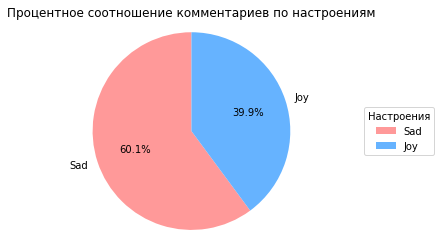

In [ ]:
joy_count = (y_tweets_pred == 'joy').sum()
sad_count = (y_tweets_pred == 'sad').sum()

sizes = [sad_count, joy_count]
labels = ['Sad', 'Joy']
colors = ['#ff9999', '#66b3ff']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

ax.legend(labels, title="Настроения", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.title("Процентное соотношение комментариев по настроениям")

plt.show()

## **Задание 7**

Проанализируйте тональность постов из набора данных COVID19 Tweets с помощью библиотеки Dostoevsky или TextBlob. Какое процентное соотношение постов разных настроений наблюдается?

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    
    if polarity > 0:
        return 'joy'
    else:
        return 'sad'

In [ ]:
df_tweets['sentiment_textblob'] = df_tweets['text'].apply(lambda x: get_sentiment(' '.join(x)))

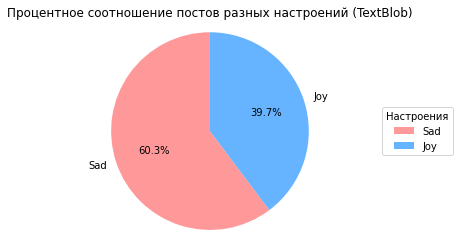

In [ ]:
joy_count = (df_tweets['sentiment_textblob'] == 'joy').sum()
sad_count = (df_tweets['sentiment_textblob'] == 'sad').sum()

sizes = [sad_count, joy_count]
labels = ['Sad', 'Joy']
colors = ['#ff9999', '#66b3ff']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

ax.legend(labels, title="Настроения", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.title("Процентное соотношение постов разных настроений (TextBlob)")

plt.show()